In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import itertools
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
import spacy
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import string
import re
import nltk
import collections
from nltk.corpus import stopwords
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from empath import Empath
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

Using TensorFlow backend.


In [2]:
#segerigating fake and real news
df = pd.read_csv('data.csv')#done,well running
df.loc[df['Label']== 0, 'Label'] = 'REAL'
df.loc[df['Label']== 1, 'Label'] = 'FAKE'
df.columns
df['Label'].value_counts()

REAL    2137
FAKE    1872
Name: Label, dtype: int64

In [6]:
#Selecting only fake news from all the types of news and then replacing the 'fake' by 0(qualitative to quantitative)
df1 = pd.read_csv('fake.csv')#done, welll running
df1.columns
df1['type'].value_counts()
df1 = df1.loc[df1['type']=='fake']
df1.loc[df1['type']== 'fake', 'type'] = 'FAKE'

In [7]:
#Selecting some columns from the table and renaming them\n",
df1 = df1[['title','text','type']]
df1.columns = ['Headline', 'Body', 'Label']
df1['Label'].value_counts()

FAKE    19
Name: Label, dtype: int64

In [8]:
df2 = pd.read_csv('fake_or_real_news.csv')
df2.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [9]:
#Selecting few columns from the table and renaming the columns
df2 = df2[['title','text','label']]
df2.columns = ['Headline', 'Body', 'Label']
df2.columns
df2['Label'].value_counts()

REAL    3171
FAKE    3164
Name: Label, dtype: int64

In [10]:
df = df.drop_duplicates()

# df.iloc[3647]
# print(df['Headline'][3647])
# print(len(df['Body'][3647]))
#df = df.dropna(how='any',axis=0)
cnt = 0
ind = []
for art in df['Body']:
    #print(type(art))
    if len(str(art)) < 10:
        ind.append(cnt)
    cnt+=1
df = df.drop(df.index[ind])
        

df
print(df['Headline'][3647])
print(len(df['Body'][3647]))


Supreme Court tosses one of two travel ban challenges
2599


In [11]:
df['Label'].value_counts()

REAL    1803
FAKE    1719
Name: Label, dtype: int64

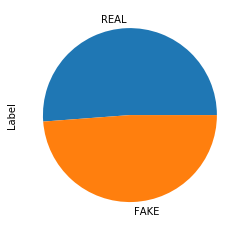

In [12]:
df['Label'].value_counts().plot(kind = 'pie')

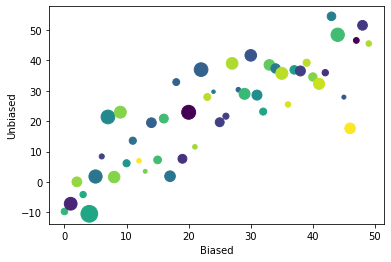

In [13]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('Biased')
plt.ylabel('Unbiased')
plt.show()

In [14]:
df['headline_length'] = [len(str(a)) for a in df['Headline']]
df['headline_length'].describe()

count    3522.000000
mean       61.073538
std        22.508883
min         6.000000
25%        50.000000
50%        61.000000
75%        70.000000
max       653.000000
Name: headline_length, dtype: float64

In [16]:
df['body_length'] = [len(str(a)) for a in df['Body']]
df['body_length'].describe()

count     3522.000000
mean      2920.565020
std       3150.144787
min         66.000000
25%        411.250000
50%       2069.000000
75%       4301.500000
max      32767.000000
Name: body_length, dtype: float64

In [17]:
df.describe()

,headline_length,body_length
count,3522.000000,3522.000000
mean,61.073538,2920.565020
std,22.508883,3150.144787
min,6.000000,66.000000
25%,50.000000,411.250000
50%,61.000000,2069.000000
75%,70.000000,4301.500000
max,653.000000,32767.000000


In [18]:
df["Text"] = df["Headline"].map(str) + df["Body"]
y = df.Label
y = y.astype('str')
X_train, X_test, Y_train, Y_test = train_test_split(df['Text'],y, test_size=0.33)
X_train

1636    Art for IndependenceBy Josef Dobraszczyk (word...
1492    Judge Awards Alleged Rapist With Parental Righ...
2339    Anime hero joins Japan's antibiotics resistanc...
203     Eric Trump National anthem should be kept sacr...
3975    In picking fight with Corker, Trump risks agen...
10      U.S. President Donald Trump Quietly Signs Law ...
3071    2017 Fantasy Football Running Back Rankings - ...
3871    Russia, China call for restraint after Trump c...
3741    Here’s What Happened in N.F.L. Week 5■ The Jet...
1618    G-Fans Bid Cain AdieuG-Fans Bid Cain Adieu\n(B...
892     Trump: I have different attitude on NKPresiden...
2730    UK, EU send proposal to rest of WTO to split t...
3920    Folk Choke: Tampa Bay Bucs Kicker Misses Three...
2200    After Alleged 'Moron' Remark, Tillerson Stroke...
1925    North Koreans process salmon, snow crab eaten ...
2363    Storm Nate weakens but brings heavy rainMedia ...
545     Miami Dolphins Kneelers Crap All Over America ...
2573    A New 

In [19]:
#Tf-idf Bigrams
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (2,2)) 

# Fit and transform the training data 
tfidf1_train = tfidf_vectorizer.fit_transform(X_train.astype('str')) 

# Transform the test set 
tfidf1_test = tfidf_vectorizer.transform(X_test.astype('str'))

pickle.dump(tfidf1_train, open("tfidf1_train.pickle", "wb"))

pickle.dump(tfidf1_test, open("tfidf1_test.pickle", "wb"))

In [20]:
#Top 10 tfidf bigrams 
tfidf_vectorizer.get_feature_names()[-10:]

['álvaro garcía',
 'école nationale',
 'émigrés markovits',
 'émigrés sinking',
 'ðÿ giveusthesauce',
 'œbrilliant man',
 'əˈnänəməs adjective',
 'ʺevery friends',
 'ʺhe missed',
 '殆ww reverbnation']

In [21]:
tfidf1_train

<2359x430304 sparse matrix of type '<class 'numpy.float64'>'
	with 594697 stored elements in Compressed Sparse Row format>

In [22]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
clf = MultinomialNB()
clf.fit(tfidf1_train, Y_train)
pickle.dump(clf, open('tfidf_nb', 'wb'))
pred = clf.predict(tfidf1_test)
score = metrics.accuracy_score(Y_test, pred)
print("Accuracy with Multinomial Naive Bayes:   %0.3f" % score)

Accuracy with Multinomial Naive Bayes:   0.974


Confusion matrix


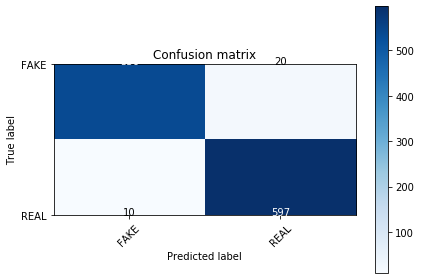

In [26]:
cm = metrics.confusion_matrix(Y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [28]:
clf = GradientBoostingClassifier()
clf.fit(tfidf1_train, Y_train)
pickle.dump(clf, open('tfidf_gb', 'wb'))
#model = pickle.load(open('tfidf_gb', 'rb'))
pred = clf.predict(tfidf1_test)
score = metrics.accuracy_score(Y_test, pred)
print("Accuracy with Gradient Boosting:   %0.3f" % score)

Accuracy with Gradient Boosting:   0.955


Confusion matrix


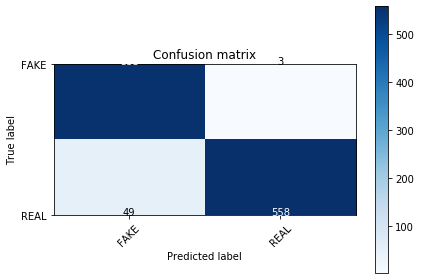

In [29]:
cm = metrics.confusion_matrix(Y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [24]:
clf = RandomForestClassifier()
clf.fit(tfidf1_train, Y_train)
pickle.dump(clf, open('tfidf_rf', 'wb'))
pred = clf.predict(tfidf1_test)
score = metrics.accuracy_score(Y_test, pred)
print("Accuracy with RandomForestClassifier:   %0.3f" % score)#takes 4 minutes

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy with RandomForestClassifier:   0.859


Confusion matrix


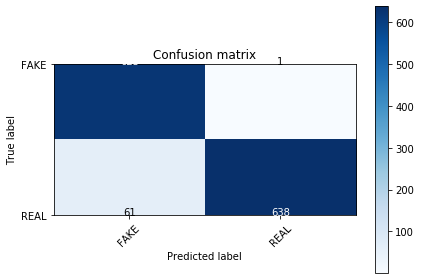

In [26]:
cm = metrics.confusion_matrix(Y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [38]:
#Generating the POS tags for all the articles and adding a new column by replacing text with their POS tags
nlp = spacy.load('en_core_web_sm')
x = []
df["Text"] = df["Headline"].map(str) + df["Body"]
for text in df['Text']:
    text_new = []
    doc = nlp(text)
    for token in doc:
        text_new.append(token.pos_)
    txt = ' '.join(text_new)
    x.append(txt)
df['Text_pos'] = x
df.to_pickle('newdata.pkl')

In [32]:
df = pd.read_pickle('newdata.pkl')
cnt = 0
ind = []
for art in df['Body']:
    #print(type(art))
    if len(str(art)) < 10:
        ind.append(cnt)
    cnt+=1
df = df.drop(df.index[ind])

In [33]:
y = df.Label
y = y.astype('str')
x_train, x_test, y_train, y_test = train_test_split(df['Text_pos'],y, test_size=0.33)
x_train

890     PROPN PROPN PROPN VERB NOUN PUNCT NOUN VERB VE...
1741    NUM NOUN PROPN PROPN VERB DET NOUN ADP NOUN NO...
693     NUM ADP PROPN PART ADJ NOUN PUNCT ADV NOUN PUN...
3329    PROPN PROPN PROPN ADP PROPN PROPN VERB PROPN P...
951     PROPN ADV VERB NOUN NOUN ADP ADJ NOUN PUNCT NO...
1062    PROPN NOUN VERB ADP PROPN PROPN PROPN PROPN AD...
463     PROPN PART ADJ PROPN ADP PROPN PROPN ADP PROPN...
4002    DET NOUN NOUN ADP PROPN PART NOUN ADP PROPN NO...
181     NOUN VERB VERB ADP NOUN ADP NOUN ADP ADP PRON ...
2487    PROPN PUNCT VERB NOUN ADP PUNCT PROPN PROPN AD...
2069    VERB DET PROPN PUNCT PROPN PROPN PROPN VERB AD...
856     ADJ PROPN NOUN PROPN PROPN PART NOUN ADP ADJ P...
2644    PROPN PROPN ADP PROPN VERB PART VERB NOUN PROP...
1890    NOUN NOUN NOUN VERB VERB VERB PUNCT VERB PART ...
752     PROPN PROPN PROPN PROPN PUNCT PROPN PUNCT ADP ...
603     PROPN PROPN PROPN PROPN PROPN ADP DET PROPN PR...
1418    PROPN VERB PROPN PART VERB PUNCT PROPN PROPN C...
1598    PROPN 

In [34]:
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (2,2)) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(x_train.astype('str')) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(x_test.astype('str'))

pickle.dump(tfidf_train, open("tfidf_train.pickle", "wb"))

pickle.dump(tfidf_test, open("tfidf_test.pickle", "wb"))

In [35]:
tfidf_vectorizer.get_feature_names()[-10:]

['verb det',
 'verb intj',
 'verb noun',
 'verb num',
 'verb pron',
 'verb propn',
 'verb punct',
 'verb space',
 'verb sym',
 'verb verb']

In [36]:
tfidf_train

<2359x193 sparse matrix of type '<class 'numpy.float64'>'
	with 174659 stored elements in Compressed Sparse Row format>

In [37]:
clf = MultinomialNB()
clf.fit(tfidf_train, y_train)
pickle.dump(clf, open('pos_nb', 'wb'))
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy with Multinomial Naive Bayes:   %0.3f" % score)

Accuracy with Multinomial Naive Bayes:   0.790


Confusion matrix


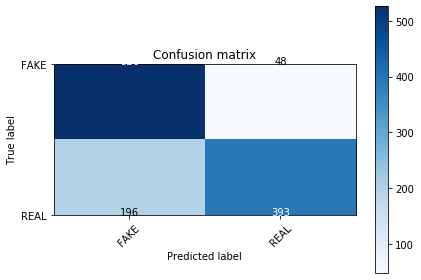

In [39]:
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [44]:
clf = RandomForestClassifier()
clf.fit(tfidf_train, y_train)
pickle.dump(clf, open('pos_rf', 'wb'))
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy with RandomForestClassifier:   %0.3f" % score)

Accuracy with RandomForestClassifier:   0.866


Confusion matrix


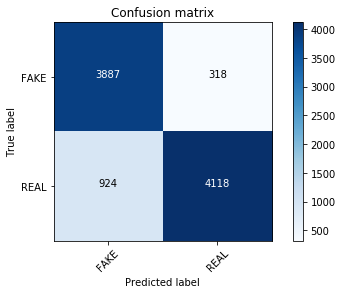

In [45]:
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [46]:
clf = GradientBoostingClassifier()
clf.fit(tfidf_train, y_train)
pickle.dump(clf, open('pos_gb', 'wb'))
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy with Gradient Boosting:   %0.3f" % score)

Accuracy with Gradient Boosting:   0.883


Confusion matrix


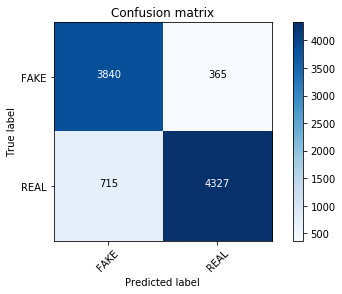

In [47]:
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [31]:
#Getting the score of semantic categories generated by Empath of each article and generating a tfidf vector of the unigrams 
lexicon = Empath()
semantic = []
cnt = 0
df["Text"] = df["Headline"].map(str) + df["Body"]

for article in df['Text']:
    if article == '':
        continue
    cnt+=1
    d = lexicon.analyze(article, normalize = False)
    x = []
    for key, value in d.items():
        x.append(value)
    x = np.asarray(x)
    semantic.append(x)
df['Semantic'] = semantic

In [32]:
categories = []
a = lexicon.analyze("")
for key, value in a.items():
    categories.append(key)
categories

['exercise',
 'horror',
 'hearing',
 'college',
 'science',
 'car',
 'government',
 'toy',
 'rural',
 'poor',
 'strength',
 'music',
 'weather',
 'payment',
 'disappointment',
 'dispute',
 'leader',
 'trust',
 'shame',
 'help',
 'musical',
 'appearance',
 'breaking',
 'ocean',
 'clothing',
 'farming',
 'traveling',
 'fabric',
 'social_media',
 'nervousness',
 'pride',
 'joy',
 'achievement',
 'zest',
 'writing',
 'ridicule',
 'anticipation',
 'suffering',
 'leisure',
 'driving',
 'party',
 'occupation',
 'sympathy',
 'reading',
 'power',
 'banking',
 'communication',
 'healing',
 'ancient',
 'masculine',
 'emotional',
 'affection',
 'messaging',
 'cooking',
 'terrorism',
 'swimming',
 'confusion',
 'death',
 'negative_emotion',
 'sound',
 'valuable',
 'beach',
 'law',
 'beauty',
 'anger',
 'superhero',
 'sailing',
 'restaurant',
 'family',
 'cold',
 'rage',
 'economics',
 'cleaning',
 'play',
 'exasperation',
 'exotic',
 'weapon',
 'positive_emotion',
 'ugliness',
 'royalty',
 'speakin

In [33]:
#TF-IDF vector by taking the score for a semantic class as its frequency.
sem = []
for i in range(df.shape[0]):
    a = []
    for j in range(len(semantic[0])):
        for k in range(int(semantic[i][j])):
            a.append(categories[j])
    b = " ".join(a)
    sem.append(b)
#print(len(sem))
df['Semantics'] = sem
df.to_pickle('Semantic.pkl')

In [34]:
df = pd.read_pickle('Semantic.pkl')
print(df.columns)
print(df.shape)

Index(['Headline', 'Body', 'Label', 'headline_length', 'body_length',
       'Body_pos', 'Text_pos', 'Text', 'Semantic', 'Semantics'],
      dtype='object')
(27865, 10)


In [45]:
y = df.Label
y = y.astype('str')
x_train, x_test, y_train, y_test = train_test_split(df['Semantics'],y, test_size=0.33)
x_train

11942    [3.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, ...
16974    [0.0, 0.0, 0.0, 2.0, 5.0, 0.0, 2.0, 1.0, 0.0, ...
27421    [10.0, 6.0, 0.0, 7.0, 5.0, 2.0, 0.0, 10.0, 0.0...
2099     [0.0, 3.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, ...
456      [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...
20244    [4.0, 10.0, 0.0, 1.0, 2.0, 3.0, 1.0, 37.0, 0.0...
18196    [2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4110     [6.0, 4.0, 1.0, 33.0, 3.0, 1.0, 0.0, 10.0, 0.0...
7468     [3.0, 0.0, 0.0, 0.0, 4.0, 3.0, 1.0, 0.0, 2.0, ...
16502    [0.0, 0.0, 0.0, 5.0, 2.0, 0.0, 0.0, 0.0, 0.0, ...
18146    [3.0, 4.0, 0.0, 9.0, 1.0, 2.0, 1.0, 5.0, 2.0, ...
6491     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
111      [1.0, 1.0, 1.0, 1.0, 0.0, 3.0, 0.0, 0.0, 0.0, ...
9181     [7.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, ...
30433    [8.0, 8.0, 4.0, 3.0, 2.0, 0.0, 0.0, 2.0, 0.0, ...
14557    [6.0, 0.0, 0.0, 2.0, 5.0, 1.0, 2.0, 0.0, 2.0, ...
4720     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, .

In [ ]:
print(type(x_train))
print(x_train.shape)

In [ ]:
#Initialize the `tfidf_vectorizer` 
tfidf2_vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,1)) 

# Fit and transform the training data 
tfidf2_train = tfidf2_vectorizer.fit_transform(x_train.astype('str')) 

# Transform the test set 
tfidf2_test = tfidf2_vectorizer.transform(x_test.astype('str'))

pickle.dump(tfidf2_train, open("tfidf2_train.pickle", "wb"))

pickle.dump(tfidf2_test, open("tfidf2_test.pickle", "wb"))

In [ ]:
clf = MultinomialNB()
#type(x_train.tolist())
clf.fit(x_train.tolist(), y_train)
pickle.dump(clf, open('sem_nb', 'wb'))
pred = clf.predict(x_test.tolist())
score = metrics.accuracy_score(y_test, pred)
print("Accuracy with Multinomial Naive Bayes:   %0.3f" % score)

In [ ]:
clf = RandomForestClassifier()
clf.fit(x_train.tolist(), y_train)
pickle.dump(clf, open('sem_rf', 'wb'))
pred = clf.predict(x_test.tolist())
score = metrics.accuracy_score(y_test, pred)
print("Accuracy with RandomForestClassifier:   %0.3f" % score)

In [ ]:
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(x_train.tolist(), y_train)
pickle.dump(clf, open('sem_gb', 'wb'))
pred = clf.predict(x_test.tolist())
score = metrics.accuracy_score(y_test, pred)
print("Accuracy with Gradient Boosting:   %0.3f" % score)

Confusion matrix


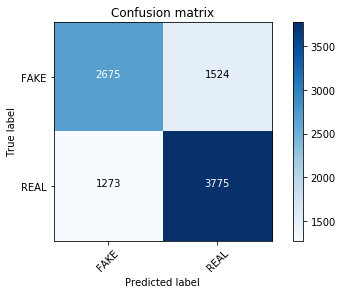

In [58]:
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
#Combining the 3 feature vectors
import scipy.sparse as sp
# ui = sp.vstack(tfidf_train, tfidf1_train)
# yu = tfidf_train.data.tolist()
# yu.append(tfidf1_train.tolist())
# test = tfidf_test.data.tolist() + x_test.tolist()
#print(type(tfidf_train), tfidf_train.shape)
#print(type(tfidf1_train), tfidf1_train.shape)
# print(type(x_train), x_train.shape)
diff_n_rows = tfidf_train.shape[0] - tfidf1_train.shape[0]

Xb_new = sp.vstack((tfidf1_train, sp.csr_matrix((diff_n_rows, tfidf1_train.shape[1])))) 
#where diff_n_rows is the difference of the number of rows between Xa and Xb

c = sp.hstack((tfidf_train, Xb_new))

diff_n_rows = c.shape[0] - tfidf2_train.shape[0]

Xb_new = sp.vstack((tfidf2_train, sp.csr_matrix((diff_n_rows, tfidf2_train.shape[1])))) 
#where diff_n_rows is the difference of the number of rows between Xa and Xb

X = sp.hstack((c, Xb_new))
X

dif_n_rows = tfidf_test.shape[0] - tfidf1_test.shape[0]

Xb_ne = sp.vstack((tfidf1_test, sp.csr_matrix((dif_n_rows, tfidf1_test.shape[1])))) 
#where diff_n_rows is the difference of the number of rows between Xa and Xb

d = sp.hstack((tfidf_test, Xb_ne))

dif_n_rows = d.shape[0] - tfidf2_test.shape[0]

Xb_ne = sp.vstack((tfidf2_test, sp.csr_matrix((dif_n_rows, tfidf2_test.shape[1])))) 
#where diff_n_rows is the difference of the number of rows between Xa and Xb

Y = sp.hstack((d, Xb_ne))



In [ ]:
clf = MultinomialNB()
#print(type(train), type(y_train.tolist()))
clf.fit(X, y_train)
pickle.dump(clf, open('pos_sem_nb', 'wb'))
pred = clf.predict(Y)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy with Multinomial Naive Bayes:   %0.3f" % score)

In [ ]:
clf = RandomForestClassifier()
clf.fit(X, y_train)
pickle.dump(clf, open('pos_sem_rf', 'wb'))
pred = clf.predict(Y)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy with RandomForestClassifier:   %0.3f" % score)

In [ ]:
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [174]:
clf = GradientBoostingClassifier()
clf.fit(X, y_train)
pickle.dump(clf, open('pos_sem_gb', 'wb'))
pred = clf.predict(Y)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy with Gradient Boosting:   %0.3f" % score)

Accuracy with Gradient Boosting:   0.882


Confusion matrix


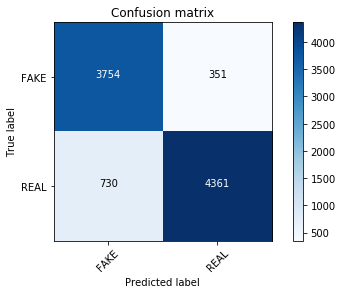

In [175]:
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [164]:
#Directly loading the final dateframe by loading the pickle file from the previously saved pickle file
df = pd.read_pickle('Semantic.pkl')
print(df.columns)
print(df.shape)

Index(['Headline', 'Body', 'Label', 'headline_length', 'body_length',
       'Body_pos', 'Text_pos', 'Text', 'Semantic', 'Semantics'],
      dtype='object')
(27865, 10)


In [165]:
y = df.Label
x_train, x_test, y_train, y_test = train_test_split(df,y, test_size=0.33)

In [166]:
x_train_text = x_train['Text']
x_test_text = x_test['Text']
x_train_text_pos = x_train['Text_pos']
x_test_text_pos = x_test['Text_pos']
x_train_semantics = x_train['Semantics']
x_test_semantics = x_test['Semantics']

In [167]:
#Tf-idf Bigrams
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (2,2), max_features = 20000) 

# Fit and transform the training data 
tfidf1_train = tfidf_vectorizer.fit_transform(x_train_text.astype('str')) 

# Transform the test set 
tfidf1_test = tfidf_vectorizer.transform(x_test_text.astype('str'))

pickle.dump(tfidf1_train, open("tfidf1_train.pickle", "wb"))

pickle.dump(tfidf1_test, open("tfidf1_test.pickle", "wb"))

In [168]:
#POS
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (2,2)) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(x_train_text_pos.astype('str')) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(x_test_text_pos.astype('str'))

pickle.dump(tfidf_train, open("tfidf_train.pickle", "wb"))

pickle.dump(tfidf_test, open("tfidf_test.pickle", "wb"))

In [169]:

#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,1)) 

# Fit and transform the training data 
tfidf2_train = tfidf_vectorizer.fit_transform(x_train_semantics.astype('str')) 

# Transform the test set 
tfidf2_test = tfidf_vectorizer.transform(x_test_semantics.astype('str'))

pickle.dump(tfidf2_train, open("tfidf_train.pickle", "wb"))

pickle.dump(tfidf2_test, open("tfidf_test.pickle", "wb"))

In [170]:
ttf1_train = tfidf1_train
ttf1_test = tfidf1_test
ttf_train = tfidf_train
ttf_test = tfidf_test
ttf2_train = tfidf2_train
ttf2_test = tfidf2_test

In [218]:
#Giving weights to each of the 3 feature vectors generated
big_w = 0.35
synt_w = 0.5
sem_w = 0.15
big_w *= 3
synt_w *= 3
sem_w *= 3
tfidf1_train = big_w*ttf1_train
tfidf1_test = big_w*ttf1_test
tfidf_train = synt_w*ttf_train
tfidf_test = synt_w*ttf_test
tfidf2_train = sem_w*ttf2_train
tfidf2_test = sem_w*ttf2_test

In [219]:
import scipy.sparse as sp
# ui = sp.vstack(tfidf_train, tfidf1_train)
# yu = tfidf_train.data.tolist()
# yu.append(tfidf1_train.tolist())
# test = tfidf_test.data.tolist() + x_test.tolist()
#print(type(tfidf_train), tfidf_train.shape)
#print(type(tfidf1_train), tfidf1_train.shape)
# print(type(x_train), x_train.shape)
diff_n_rows = tfidf_train.shape[0] - tfidf1_train.shape[0]

Xb_new = sp.vstack((tfidf1_train, sp.csr_matrix((diff_n_rows, tfidf1_train.shape[1])))) 
#where diff_n_rows is the difference of the number of rows between Xa and Xb

c = sp.hstack((tfidf_train, Xb_new))

diff_n_rows = c.shape[0] - tfidf2_train.shape[0]

Xb_new = sp.vstack((tfidf2_train, sp.csr_matrix((diff_n_rows, tfidf2_train.shape[1])))) 
#where diff_n_rows is the difference of the number of rows between Xa and Xb

X = sp.hstack((c, Xb_new))
X

dif_n_rows = tfidf_test.shape[0] - tfidf1_test.shape[0]

Xb_ne = sp.vstack((tfidf1_test, sp.csr_matrix((dif_n_rows, tfidf1_test.shape[1])))) 
#where diff_n_rows is the difference of the number of rows between Xa and Xb

d = sp.hstack((tfidf_test, Xb_ne))

dif_n_rows = d.shape[0] - tfidf2_test.shape[0]

Xb_ne = sp.vstack((tfidf2_test, sp.csr_matrix((dif_n_rows, tfidf2_test.shape[1])))) 
#where diff_n_rows is the difference of the number of rows between Xa and Xb

Y = sp.hstack((d, Xb_ne))


In [220]:
clf = MultinomialNB()
#type(x_train.tolist())
clf.fit(X, y_train)
pickle.dump(clf, open('bi_pos_sem_nb', 'wb'))
pred = clf.predict(Y)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy with Multinomial Naive Bayes:   %0.3f" % score)

Accuracy with Multinomial Naive Bayes:   0.927


Confusion matrix


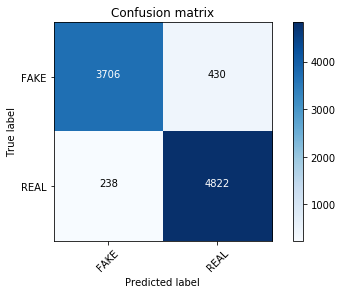

In [221]:
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [222]:
clf = RandomForestClassifier()
clf.fit(X, y_train)
pickle.dump(clf, open('bi_pos_sem_rf', 'wb'))
pred = clf.predict(Y)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy with RandomForestClassifier:   %0.3f" % score)

Accuracy with RandomForestClassifier:   0.868


Confusion matrix


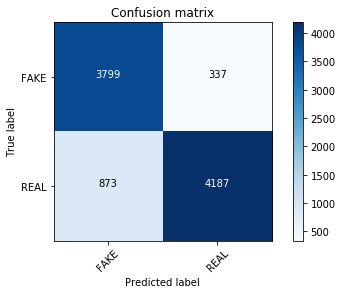

In [223]:
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [214]:
clf = GradientBoostingClassifier()
clf.fit(X, y_train)
pickle.dump(clf, open('pos_gb', 'wb'))
pred = clf.predict(Y)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy with Gradient Boosting:   %0.3f" % score)

Accuracy with Gradient Boosting:   0.915


Confusion matrix


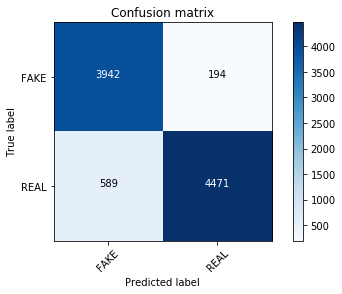

In [215]:
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
#For testing any new article 
a = (open('a.txt'))
x_test = a.read()

In [ ]:
#Tf-idf Bigrams
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (2,2), max_features = 20000) 

# Fit and transform the training data 
tfidf1_train = tfidf_vectorizer.fit_transform(x_train_text.astype('str')) 

# Transform the test set 
tfidf1_test = tfidf_vectorizer.transform([x_test])


In [ ]:
nlp = spacy.load('en_core_web_sm')
x = []
text_new = []
doc = nlp(x_test)
for token in doc:
    text_new.append(token.pos_)
txt = ' '.join(text_new)
txt

In [ ]:
#Tf-idf Bigrams
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (2,2)) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(x_train_text_pos.astype('str')) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform([x_test])

In [ ]:
categories = []
a = lexicon.analyze("")
for key, value in a.items():
    categories.append(key)
categories
lexicon = Empath()
semantic = []
cnt = 0
d = lexicon.analyze(x_test)
d
sem = []
for key,value in d.items() :
    sem.append(value)
a = []
for j in range(len(sem)):
    for k in range(int(sem[j])):
        a.append(categories[j])
    b = " ".join(a)
b

In [ ]:
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,1)) 

# Fit and transform the training data 
tfidf2_train = tfidf_vectorizer.fit_transform(x_train_semantics.astype('str')) 

# Transform the test set 
tfidf2_test = tfidf_vectorizer.transform([b])

In [ ]:
import scipy.sparse as sp
# ui = sp.vstack(tfidf_train, tfidf1_train)
# yu = tfidf_train.data.tolist()
# yu.append(tfidf1_train.tolist())
# test = tfidf_test.data.tolist() + x_test.tolist()
#print(type(tfidf_train), tfidf_train.shape)
#print(type(tfidf1_train), tfidf1_train.shape)
# print(type(x_train), x_train.shape)
diff_n_rows = tfidf_train.shape[0] - tfidf1_train.shape[0]

Xb_new = sp.vstack((tfidf1_train, sp.csr_matrix((diff_n_rows, tfidf1_train.shape[1])))) 
#where diff_n_rows is the difference of the number of rows between Xa and Xb

c = sp.hstack((tfidf_train, Xb_new))

diff_n_rows = c.shape[0] - tfidf2_train.shape[0]

Xb_new = sp.vstack((tfidf2_train, sp.csr_matrix((diff_n_rows, tfidf2_train.shape[1])))) 
#where diff_n_rows is the difference of the number of rows between Xa and Xb

X = sp.hstack((c, Xb_new))
X

dif_n_rows = tfidf_test.shape[0] - tfidf1_test.shape[0]

Xb_ne = sp.vstack((tfidf1_test, sp.csr_matrix((dif_n_rows, tfidf1_test.shape[1])))) 
#where diff_n_rows is the difference of the number of rows between Xa and Xb

d = sp.hstack((tfidf_test, Xb_ne))

dif_n_rows = d.shape[0] - tfidf2_test.shape[0]

Xb_ne = sp.vstack((tfidf2_test, sp.csr_matrix((dif_n_rows, tfidf2_test.shape[1])))) 
#where diff_n_rows is the difference of the number of rows between Xa and Xb

Y = sp.hstack((d, Xb_ne))


In [ ]:
clf = MultinomialNB()
#type(x_train.tolist())
clf.fit(X, y_train)
clf.predict(Y)